In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('Dataset for the project/train/train.csv')
df_test = pd.read_csv('Dataset for the project/test/test.csv')
df = df1.copy()
df.shape,df_test.shape

((4209, 378), (4209, 377))

In [3]:
df.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [5]:
Missing_Data_Columns = []
Categorical = list()
for i in df.columns:
    if df[i].isnull().sum() !=0:
        Missing_Data_Columns.append(i)
    if df[i].dtypes ==object:
        Categorical.append(i)
Numerical = list(set(df.columns) - set(Categorical)) 
print('Categorical_columns: ', Categorical)
print('Numerical_columns: ', Numerical)
print('Missing_data_columns: ',Missing_Data_Columns)

Categorical_columns:  ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
Numerical_columns:  ['X242', 'X343', 'X247', 'X292', 'X383', 'X324', 'X267', 'X356', 'X18', 'X318', 'X34', 'X103', 'X365', 'X159', 'X295', 'X269', 'X30', 'X106', 'X168', 'X129', 'X208', 'X327', 'X282', 'X213', 'X357', 'X259', 'X87', 'X200', 'X150', 'X370', 'X20', 'X123', 'X161', 'X345', 'X278', 'X92', 'X94', 'X261', 'X285', 'X33', 'X173', 'X175', 'X262', 'X333', 'X342', 'X301', 'X76', 'X144', 'X317', 'X307', 'X362', 'X117', 'X65', 'X335', 'X360', 'X192', 'X64', 'X162', 'X46', 'X147', 'X289', 'X113', 'X40', 'X320', 'X204', 'X104', 'X350', 'X361', 'ID', 'X119', 'X174', 'X371', 'X47', 'X272', 'X221', 'X220', 'X125', 'X17', 'X227', 'X75', 'X96', 'X249', 'X24', 'X133', 'X157', 'X329', 'X102', 'X11', 'X114', 'X313', 'X330', 'X366', 'X55', 'X81', 'X235', 'X237', 'X246', 'X308', 'X112', 'X164', 'X283', 'X296', 'X326', 'X316', 'X35', 'X71', 'X80', 'X215', 'X368', 'X28', 'X264', 'X234', 'X212', 'X344', 'X379', 'X108', 'X146',

In [6]:
df.corr()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,1.000000,-0.055108,0.001602,NaN,0.058988,-0.031917,-0.025438,0.002237,-0.036480,-0.038171,...,0.045229,-0.080259,-0.022965,0.030371,0.023382,-0.013577,-0.038171,-0.009332,-0.015355,0.029059
y,-0.055108,1.000000,-0.026985,NaN,0.089792,0.048276,0.193643,0.023116,0.048946,-0.159815,...,0.029100,0.114005,0.061403,-0.258679,0.067919,0.040932,-0.159815,0.040291,-0.004591,-0.022280
X10,0.001602,-0.026985,1.000000,NaN,-0.033084,-0.028806,-0.100474,-0.002532,-0.005944,-0.010164,...,0.165277,-0.028618,-0.074244,-0.016870,-0.011374,-0.010479,-0.010164,-0.004740,-0.002532,-0.004387
X11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X12,0.058988,0.089792,-0.033084,NaN,1.000000,0.214825,-0.246513,-0.006212,-0.014584,-0.024937,...,-0.107864,-0.070214,0.030134,-0.016043,-0.027907,-0.005566,-0.024937,-0.011628,-0.006212,-0.010765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X380,-0.013577,0.040932,-0.010479,NaN,-0.005566,0.023045,0.007743,-0.001968,-0.004619,-0.007899,...,-0.061741,-0.022240,-0.061168,-0.013110,-0.008839,1.000000,-0.007899,-0.003683,-0.001968,-0.003410
X382,-0.038171,-0.159815,-0.010164,NaN,-0.024937,-0.021713,0.012713,-0.001908,-0.004480,1.000000,...,-0.059883,-0.021571,-0.059327,-0.012716,-0.008573,-0.007899,1.000000,-0.003572,-0.001908,-0.003307
X383,-0.009332,0.040291,-0.004740,NaN,-0.011628,-0.010125,0.023604,-0.000890,-0.002089,-0.003572,...,-0.015413,-0.010059,0.035107,-0.005930,-0.003998,-0.003683,-0.003572,1.000000,-0.000890,-0.001542
X384,-0.015355,-0.004591,-0.002532,NaN,-0.006212,0.041242,0.025199,-0.000475,-0.001116,-0.001908,...,-0.014917,-0.005373,0.008694,-0.003168,-0.002136,-0.001968,-0.001908,-0.000890,1.000000,-0.000824


# Linear Regression Without EDA and Removing Categorical columns

In [7]:
df = df.drop(Categorical,axis = 1)
df.columns

Index(['ID', 'y', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=370)

In [8]:
from sklearn.model_selection import train_test_split
X = df[df.columns[2:]]
y = df[df.columns[1]]
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=123)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((2946, 368), (2946,), (1263, 368), (1263,))

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [10]:
lr.fit(X_train,y_train)

LinearRegression()

In [11]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score

In [12]:
pr_train = lr.predict(X_train)
pr_test = lr.predict(X_test)

mse = mean_squared_error(y_train,pr_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train,pr_train)
mape = mean_absolute_percentage_error(y_train,pr_train)
r2 = r2_score(y_train,pr_train)
print('--------------Train_Data--------------')
print('Mean_Squared_Error: {}\nRoot_Mean_Squared_Error: {}\nMean_Absolute_Error: {} \nMean_Absolute_percentage_Error: {} \nR2: {}'.format(mse,rmse,mae,mape,r2))

mse_test = mean_squared_error(y_test,pr_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test,pr_test)
mape_test = mean_absolute_percentage_error(y_test,pr_test)
r2_test = r2_score(y_test,pr_test)
print('---------------Test_Data-----------------')
print('Mean_Squared_Error: {}\nRoot_Mean_Squared_Error: {}\nMean_Absolute_Error: {} \nMean_Absolute_percentage_Error: {} \nR2: {}'.format(mse_test,rmse_test,mae_test,mape_test,r2_test))


--------------Train_Data--------------
Mean_Squared_Error: 66.74716445657248
Root_Mean_Squared_Error: 8.16989378490152
Mean_Absolute_Error: 5.191006873727087 
Mean_Absolute_percentage_Error: 0.04964761733060856 
R2: 0.5882752578295297
---------------Test_Data-----------------
Mean_Squared_Error: 5.467415261563386e+25
Root_Mean_Squared_Error: 7394197225908.562
Mean_Absolute_Error: 393860706984.22406 
Mean_Absolute_percentage_Error: 3686571466.114432 
R2: -3.471569081244838e+23


# EDA

In [13]:
df2 = df1.copy()
for i in Categorical:
    print('{}:{}\n'.format(i,df2[i].unique()))

X0:['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']

X1:['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']

X2:['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']

X3:['a' 'e' 'c' 'f' 'd' 'b' 'g']

X4:['d' 'b' 'c' 'a']

X5:['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']

X6:['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']

X8:['o' 'x' 'e' 'n' 's' 'a' 'h' 'p' 'm' 'k' 'd' 'i' 'v' 'j' 'b' 'q' 'w' 'g'
 'y' 'l' 'f' 'u' 'r' 't' 'c']



In [14]:
print("Duplicated Rows: ")
df2[df2.duplicated()]

Duplicated Rows: 


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385


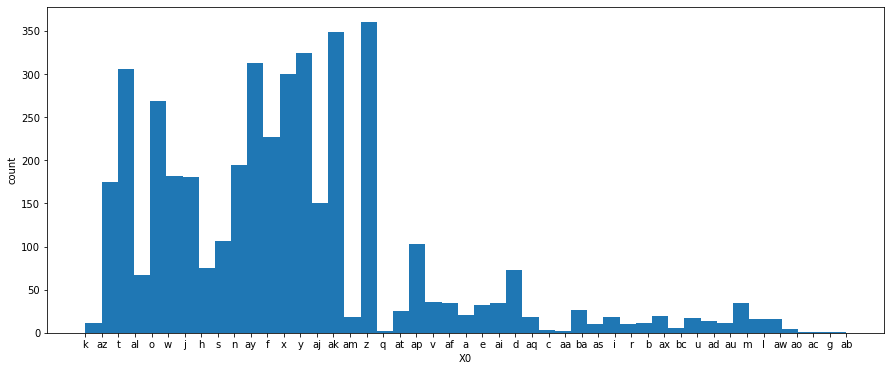

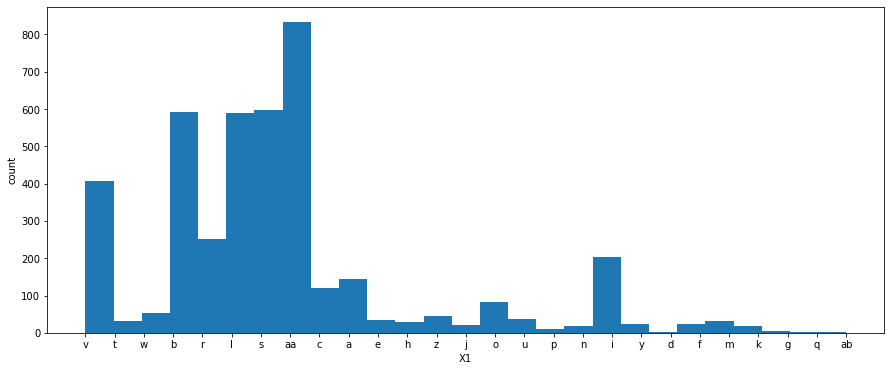

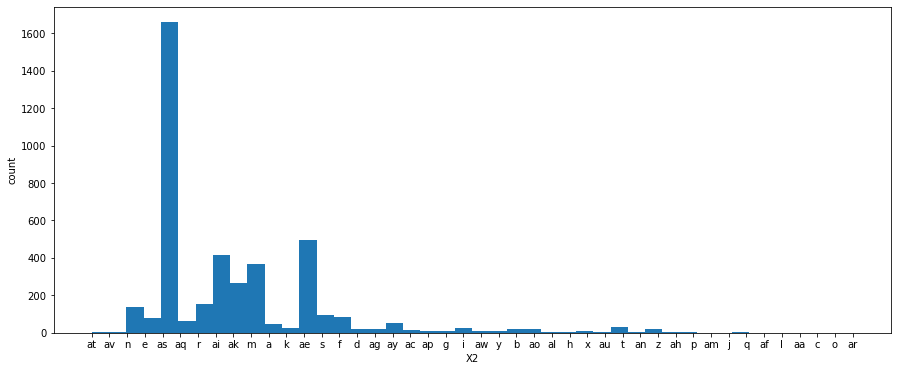

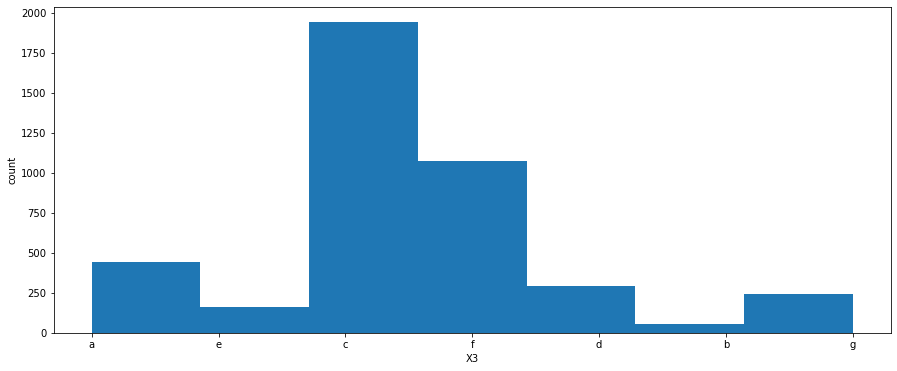

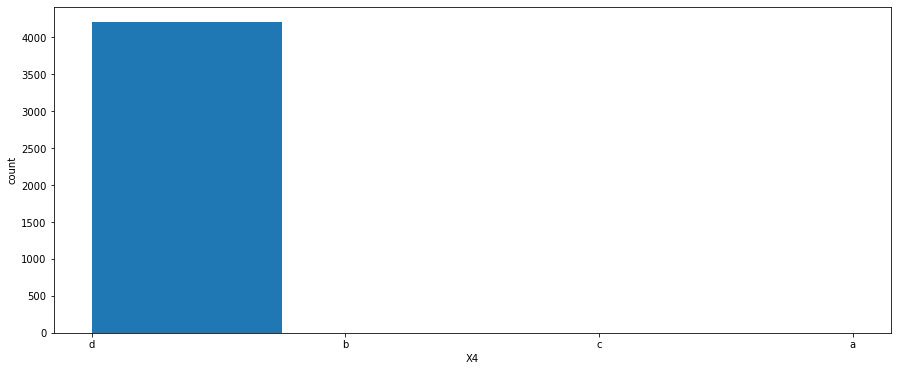

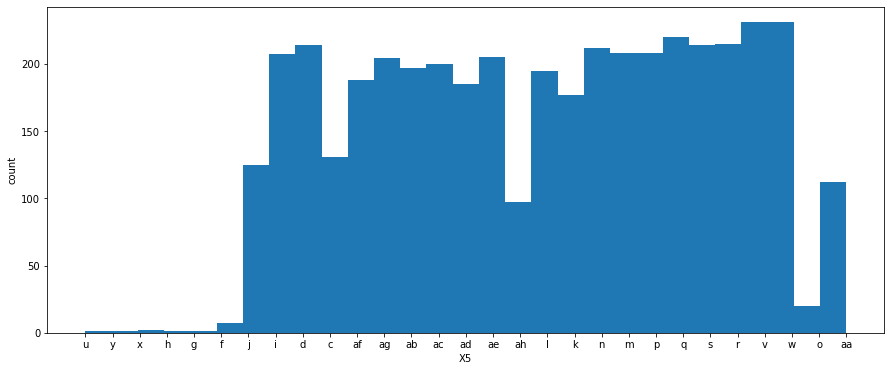

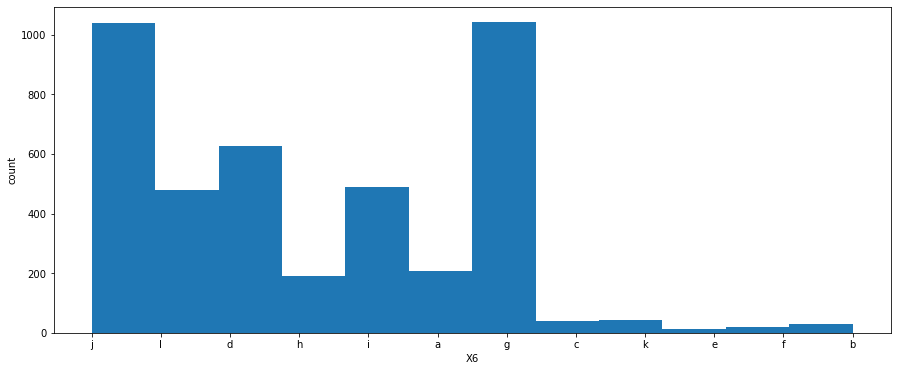

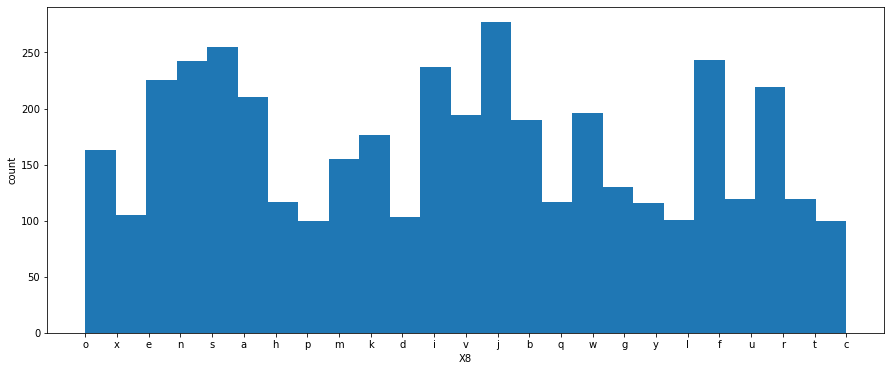

In [15]:
for i in Categorical:
    plt.figure(figsize=(15,6))
    plt.hist(df1[i],bins=df2[i].nunique())
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()

In [16]:
from sklearn.preprocessing import OrdinalEncoder
df2[Categorical] = OrdinalEncoder().fit_transform(df2[Categorical])

In [21]:
for i in Categorical:
    print('{}:{}\n'.format(i,df2[i].unique()))

X0:[32. 20. 40.  9. 36. 43. 31. 29. 39. 35. 19. 27. 44. 45.  7.  8. 10. 46.
 37. 15. 12. 42.  5.  0. 26.  6. 25. 13. 24.  1. 22. 14. 30. 38. 21. 18.
 23. 41.  4. 16. 34. 33. 17. 11.  3. 28.  2.]

X1:[23. 21. 24.  3. 19. 13. 20.  1.  4.  0.  6.  9. 26. 11. 16. 22. 17. 15.
 10. 25.  5.  7. 14. 12.  8. 18.  2.]

X2:[17. 19. 34. 25. 16. 14. 38.  7.  8. 33.  0. 31.  3. 39. 26. 24.  5. 21.
  2. 13. 27. 29. 20. 42. 22. 12.  9. 28. 41. 18. 40. 11. 43.  6. 36. 10.
 30. 37.  4. 32.  1. 23. 35. 15.]

X3:[0. 4. 2. 5. 3. 1. 6.]

X4:[3. 1. 2. 0.]

X5:[24. 28. 27. 12. 11. 10. 14. 13.  9.  8.  5.  6.  1.  2.  3.  4.  7. 16.
 15. 18. 17. 20. 21. 23. 22. 25. 26. 19.  0.]

X6:[ 9. 11.  3.  7.  8.  0.  6.  2. 10.  4.  5.  1.]

X8:[14. 23.  4. 13. 18.  0.  7. 15. 12. 10.  3.  8. 21.  9.  1. 16. 22.  6.
 24. 11.  5. 20. 17. 19.  2.]



<AxesSubplot:>

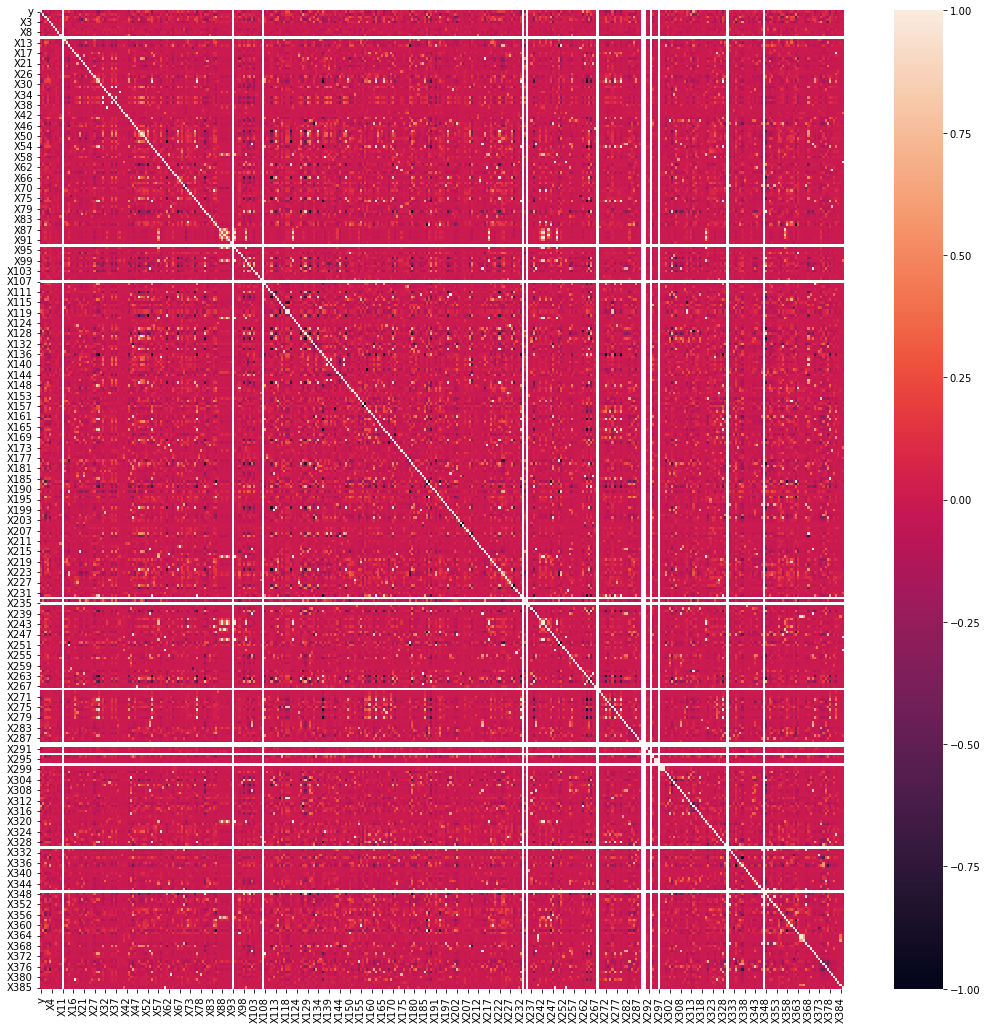

In [20]:
df3 = df2.drop(['ID'],axis=1)
plt.figure(figsize = (18,18))
sns.heatmap(data = df3.corr())

In [ ]:
drop_columns =[]


In [25]:
X = df2[df2.columns[2:]]
y = df2[df2.columns[1]]
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=123)
lr = LinearRegression()
lr.fit(X_train,y_train)
pr_train = lr.predict(X_train)
pr_test = lr.predict(X_test)

mse = mean_squared_error(y_train,pr_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train,pr_train)
mape = mean_absolute_percentage_error(y_train,pr_train)
r2 = r2_score(y_train,pr_train)
print('--------------Train_Data--------------')
print('Mean_Squared_Error: {}\nRoot_Mean_Squared_Error: {}\nMean_Absolute_Error: {} \nMean_Absolute_percentage_Error: {} \nR2: {}'.format(mse,rmse,mae,mape,r2))

mse_test = mean_squared_error(y_test,pr_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test,pr_test)
mape_test = mean_absolute_percentage_error(y_test,pr_test)
r2_test = r2_score(y_test,pr_test)
print('---------------Test_Data-----------------')
print('Mean_Squared_Error: {}\nRoot_Mean_Squared_Error: {}\nMean_Absolute_Error: {} \nMean_Absolute_percentage_Error: {} \nR2: {}'.format(mse_test,rmse_test,mae_test,mape_test,r2_test))


--------------Train_Data--------------
Mean_Squared_Error: 65.74089093163707
Root_Mean_Squared_Error: 8.108075661440084
Mean_Absolute_Error: 5.135964875904298 
Mean_Absolute_percentage_Error: 0.04903747648291448 
R2: 0.5944823785511382
---------------Test_Data-----------------
Mean_Squared_Error: 3.033898887934072e+20
Root_Mean_Squared_Error: 17418090848.121307
Mean_Absolute_Error: 886628195.8828174 
Mean_Absolute_percentage_Error: 8597826.071997222 
R2: -1.926392833011796e+18
